In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

df = pd.read_csv("../data/data_raw.csv")
df = df.drop('id', 1)
df = df.replace('M', 'Malignant')
df = df.replace('B', 'Benign')
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  Malignant        17.99         10.38          122.80     1001.0   
1  Malignant        20.57         17.77          132.90     1326.0   
2  Malignant        19.69         21.25          130.00     1203.0   
3  Malignant        11.42         20.38           77.58      386.1   
4  Malignant        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [3]:
columns = list(df.columns)

print("Initial Descriptive Statistics for each column value")
for column in columns:
    print()
    print(f"column: {column}")
    if column == "diagnosis":
        print(df[column].value_counts())
    else:
        print(df[column].describe())

Initial Descriptive Statistics for each column value

column: diagnosis
Benign       357
Malignant    212
Name: diagnosis, dtype: int64

column: radius_mean
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

column: texture_mean
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

column: perimeter_mean
count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

column: area_mean
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: 

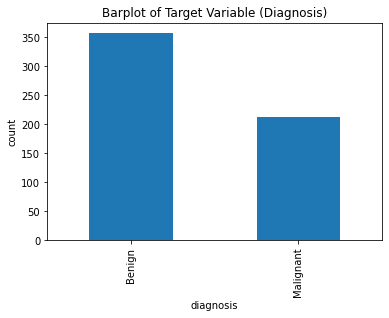

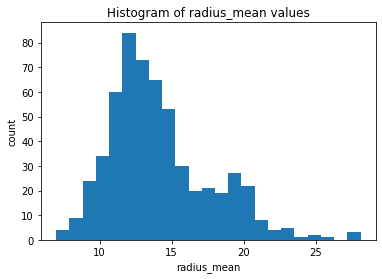

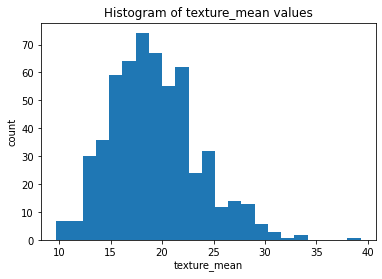

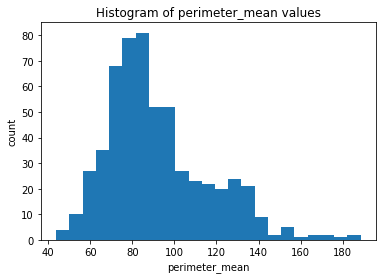

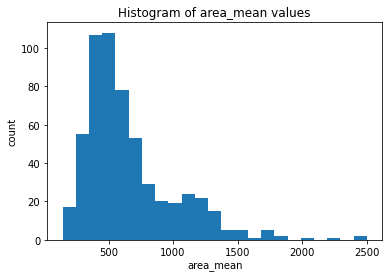

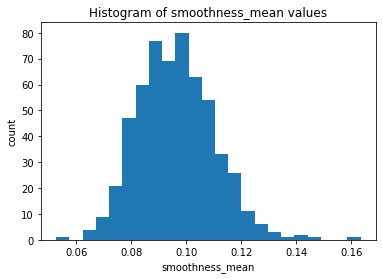

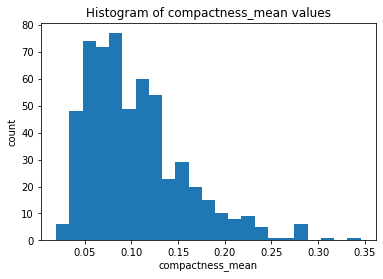

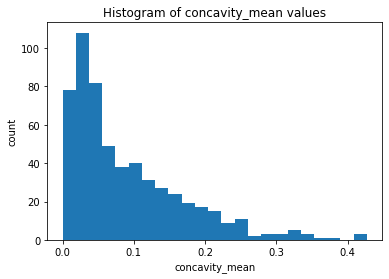

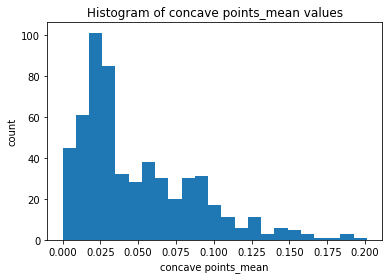

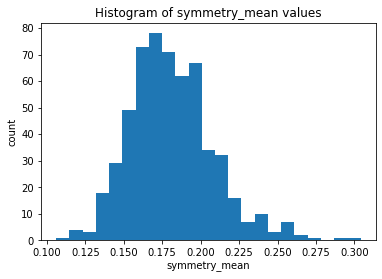

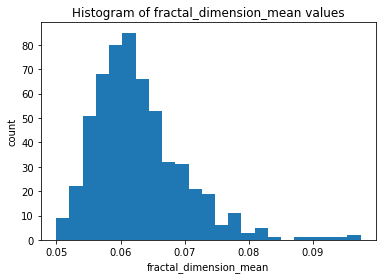

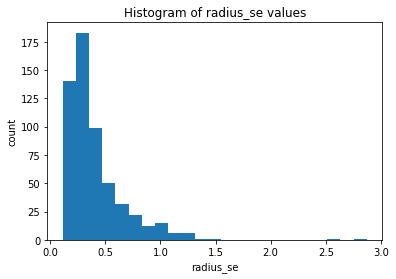

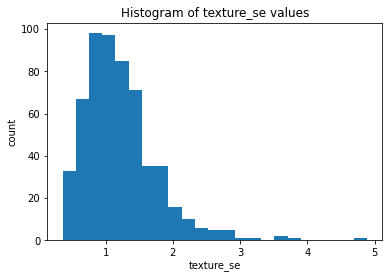

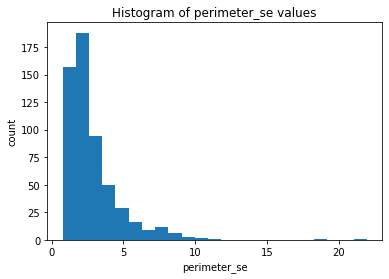

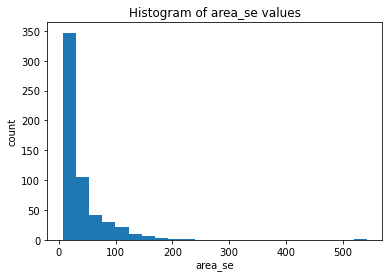

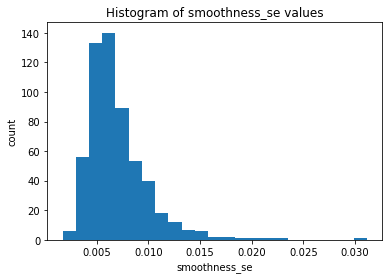

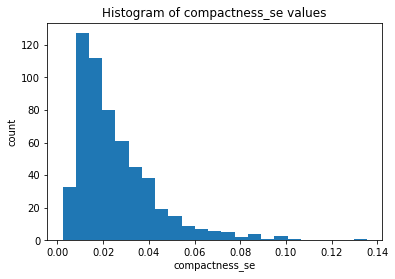

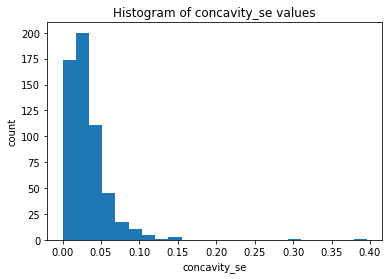

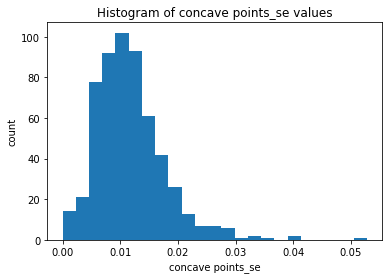

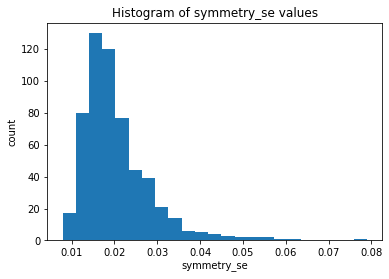

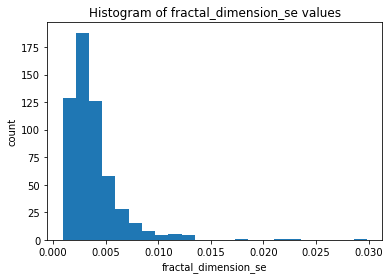

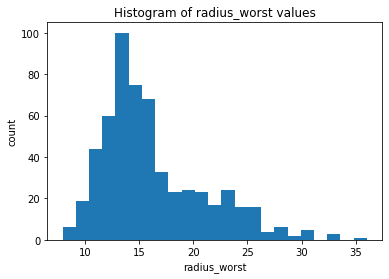

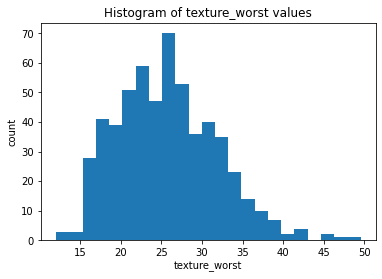

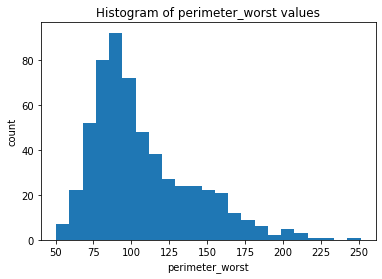

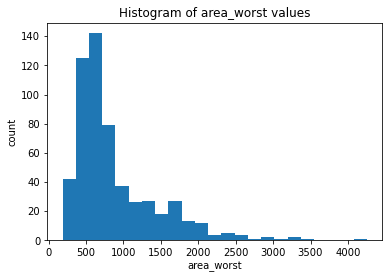

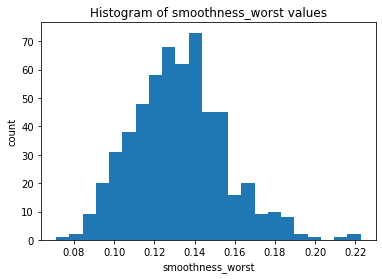

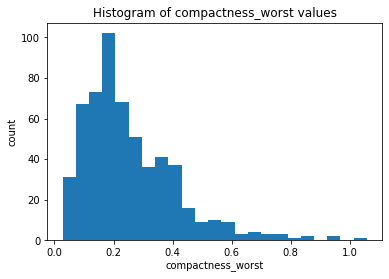

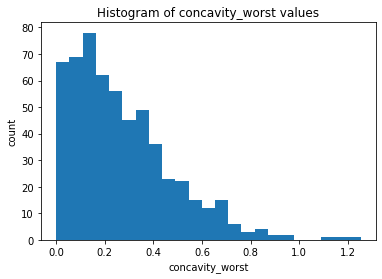

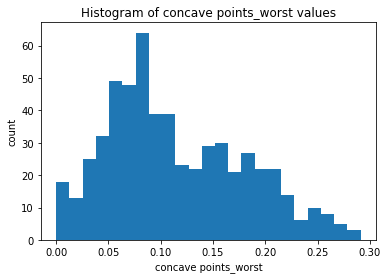

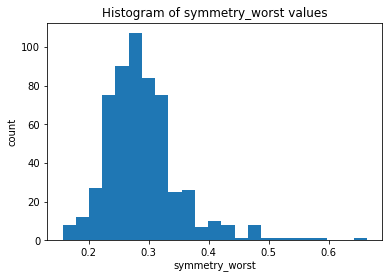

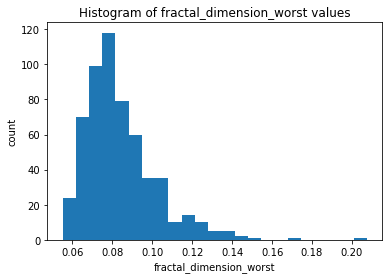

In [4]:
for column in columns:
    if column == "diagnosis":
        pd.value_counts(df[column]).plot.bar()
        figtitle = '../figures/barplot_target.png'
        plt.title('Barplot of Target Variable (Diagnosis)')
        figtitle = f'../figures/barplot_descriptive_{column}.png'
    else:
        df[column].plot.hist(bins = int(np.sqrt(df.shape[0])))
        plt.title(f'Histogram of {column} values')
        figtitle = f'../figures/histogram_descriptive_{column}.png'
    plt.xlabel(column)
    plt.ylabel('count')
    
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()

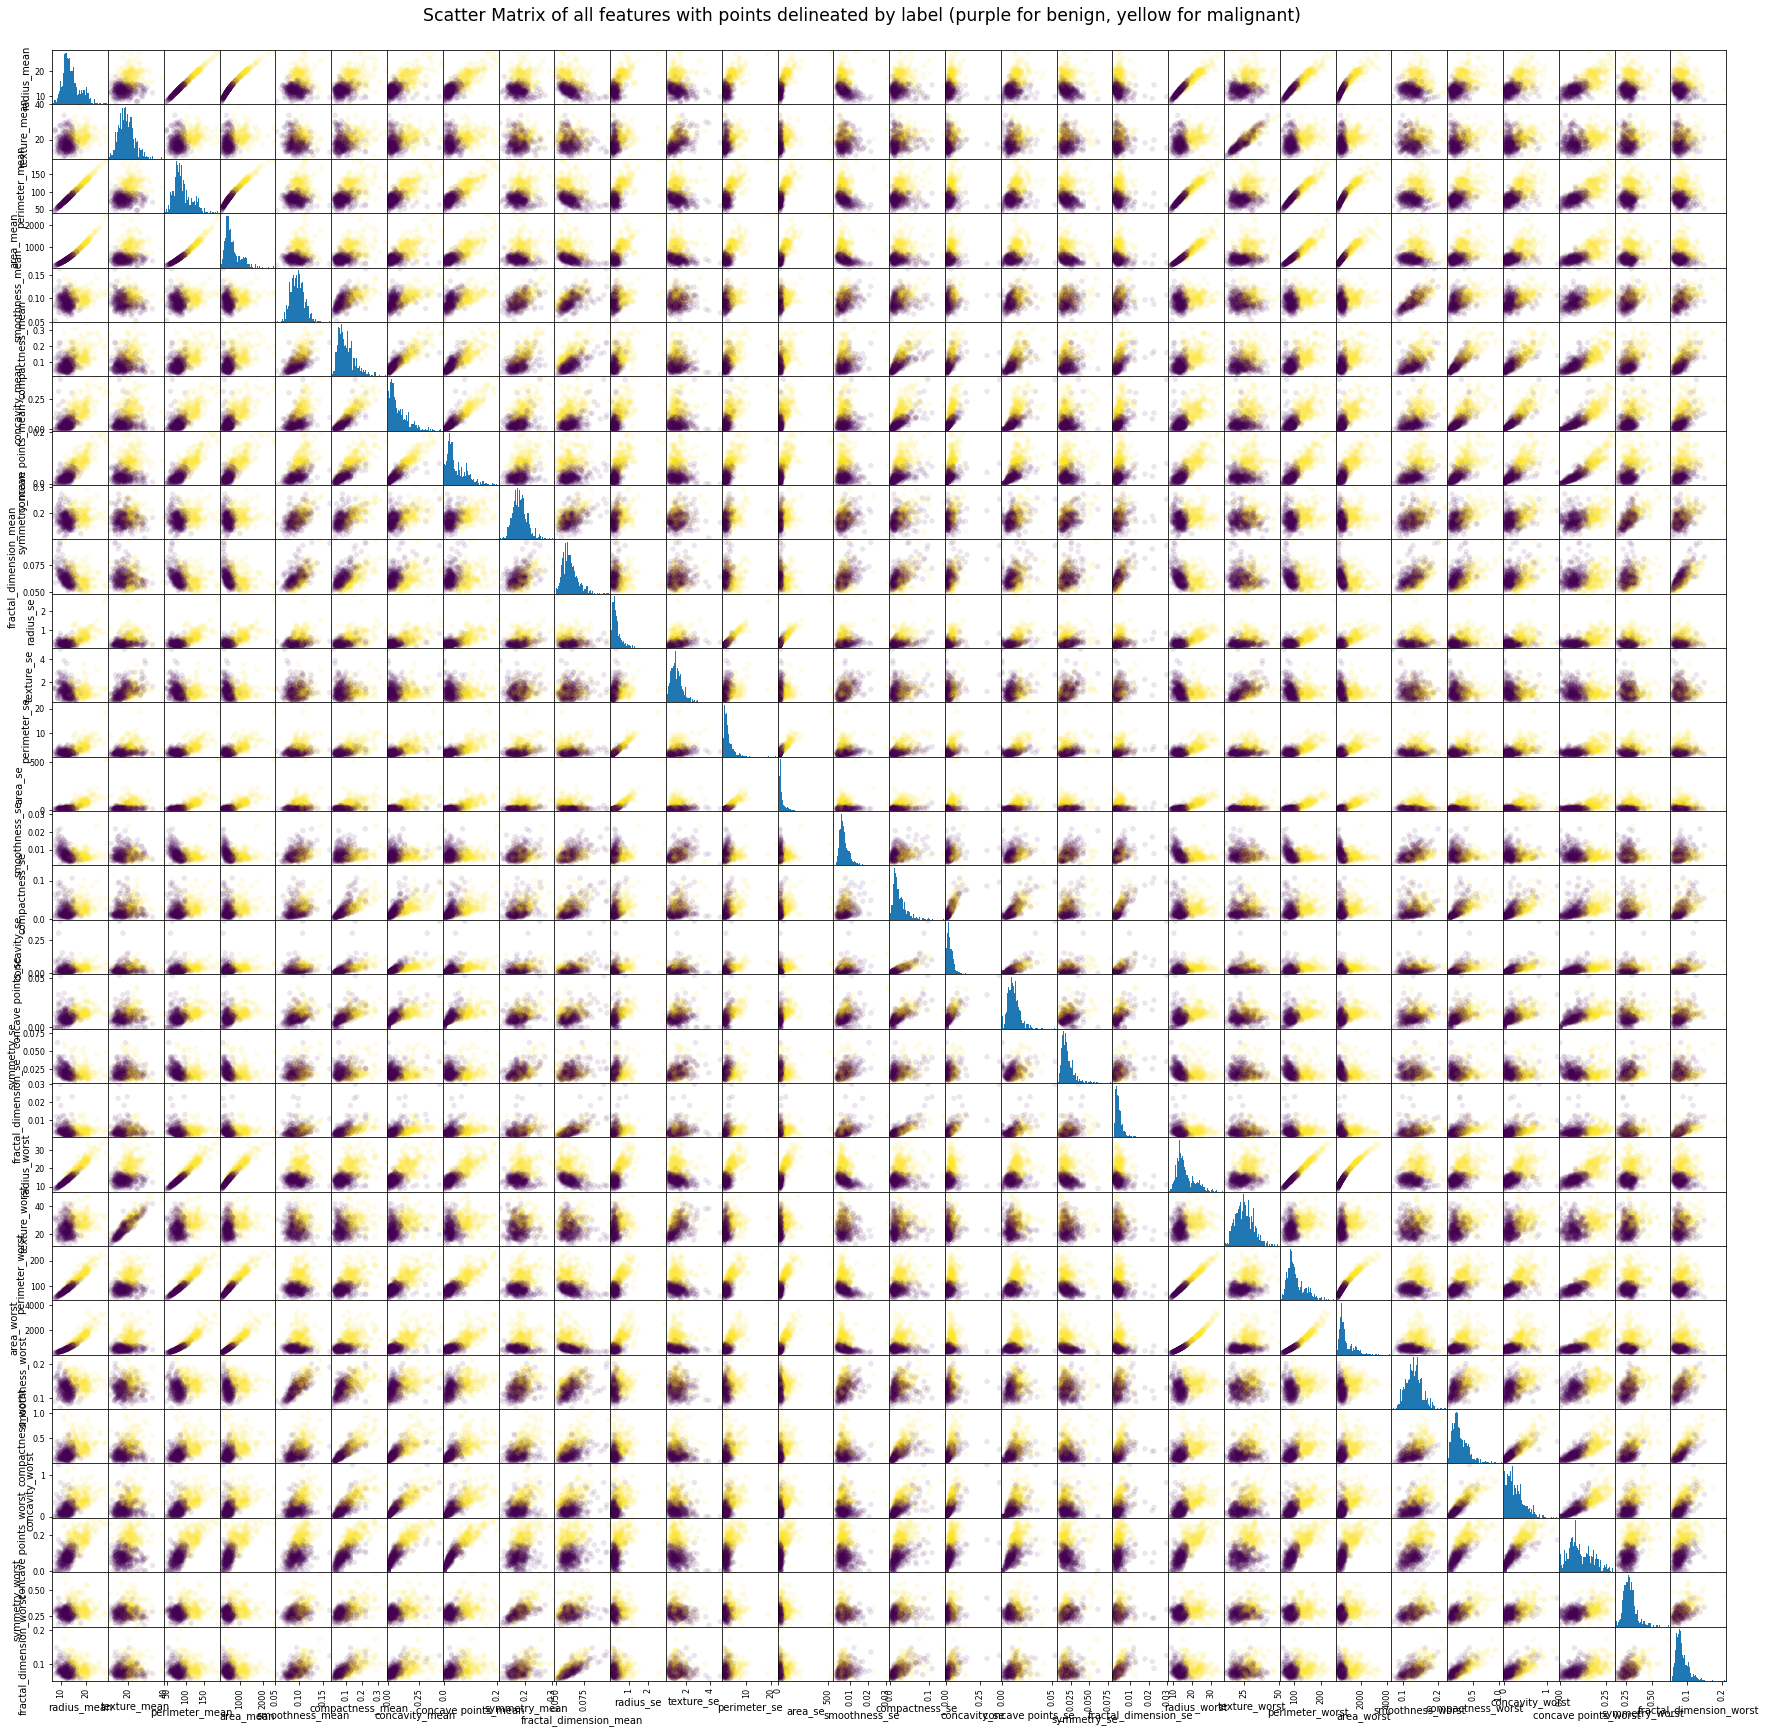

In [5]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(30, 30),c = pd.get_dummies(df['diagnosis']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.suptitle('Scatter Matrix of all features with points delineated by label (purple for benign, yellow for malignant)', 
            y = 0.90, fontsize='xx-large')
figtitle = f'../figures/scattermatrix_all_.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

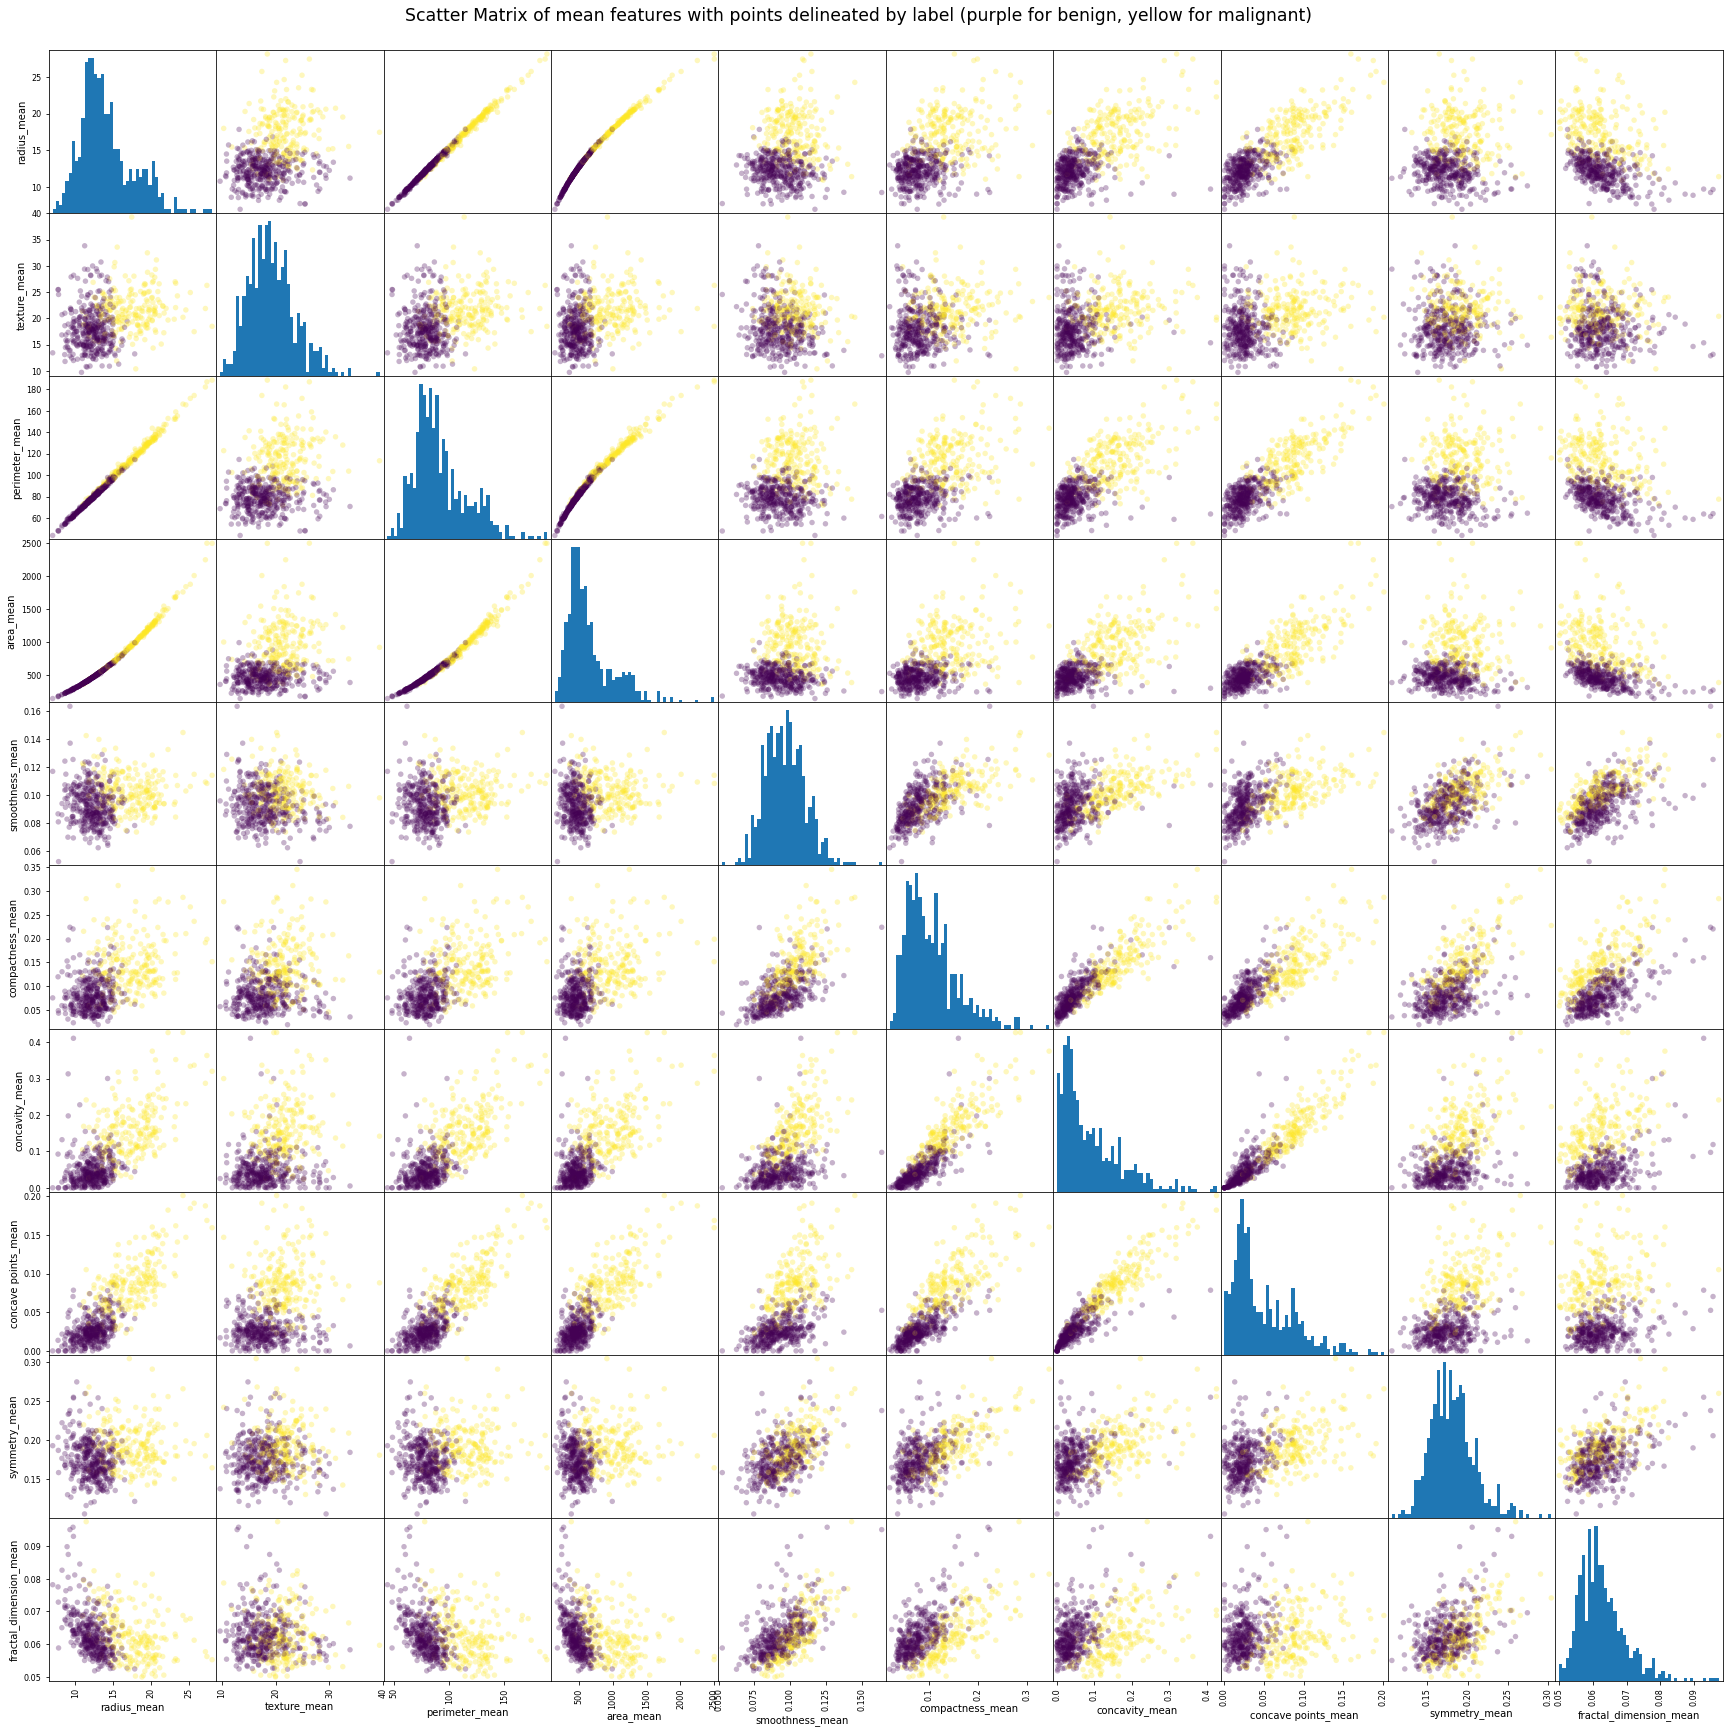

In [6]:
pd.plotting.scatter_matrix(df.iloc[:,1:11], figsize=(30, 30),c = pd.get_dummies(df['diagnosis']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.3)
plt.suptitle('Scatter Matrix of mean features with points delineated by label (purple for benign, yellow for malignant)', 
            y = 0.90, fontsize='xx-large')
figtitle = f'../figures/scattermatrix_mean.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

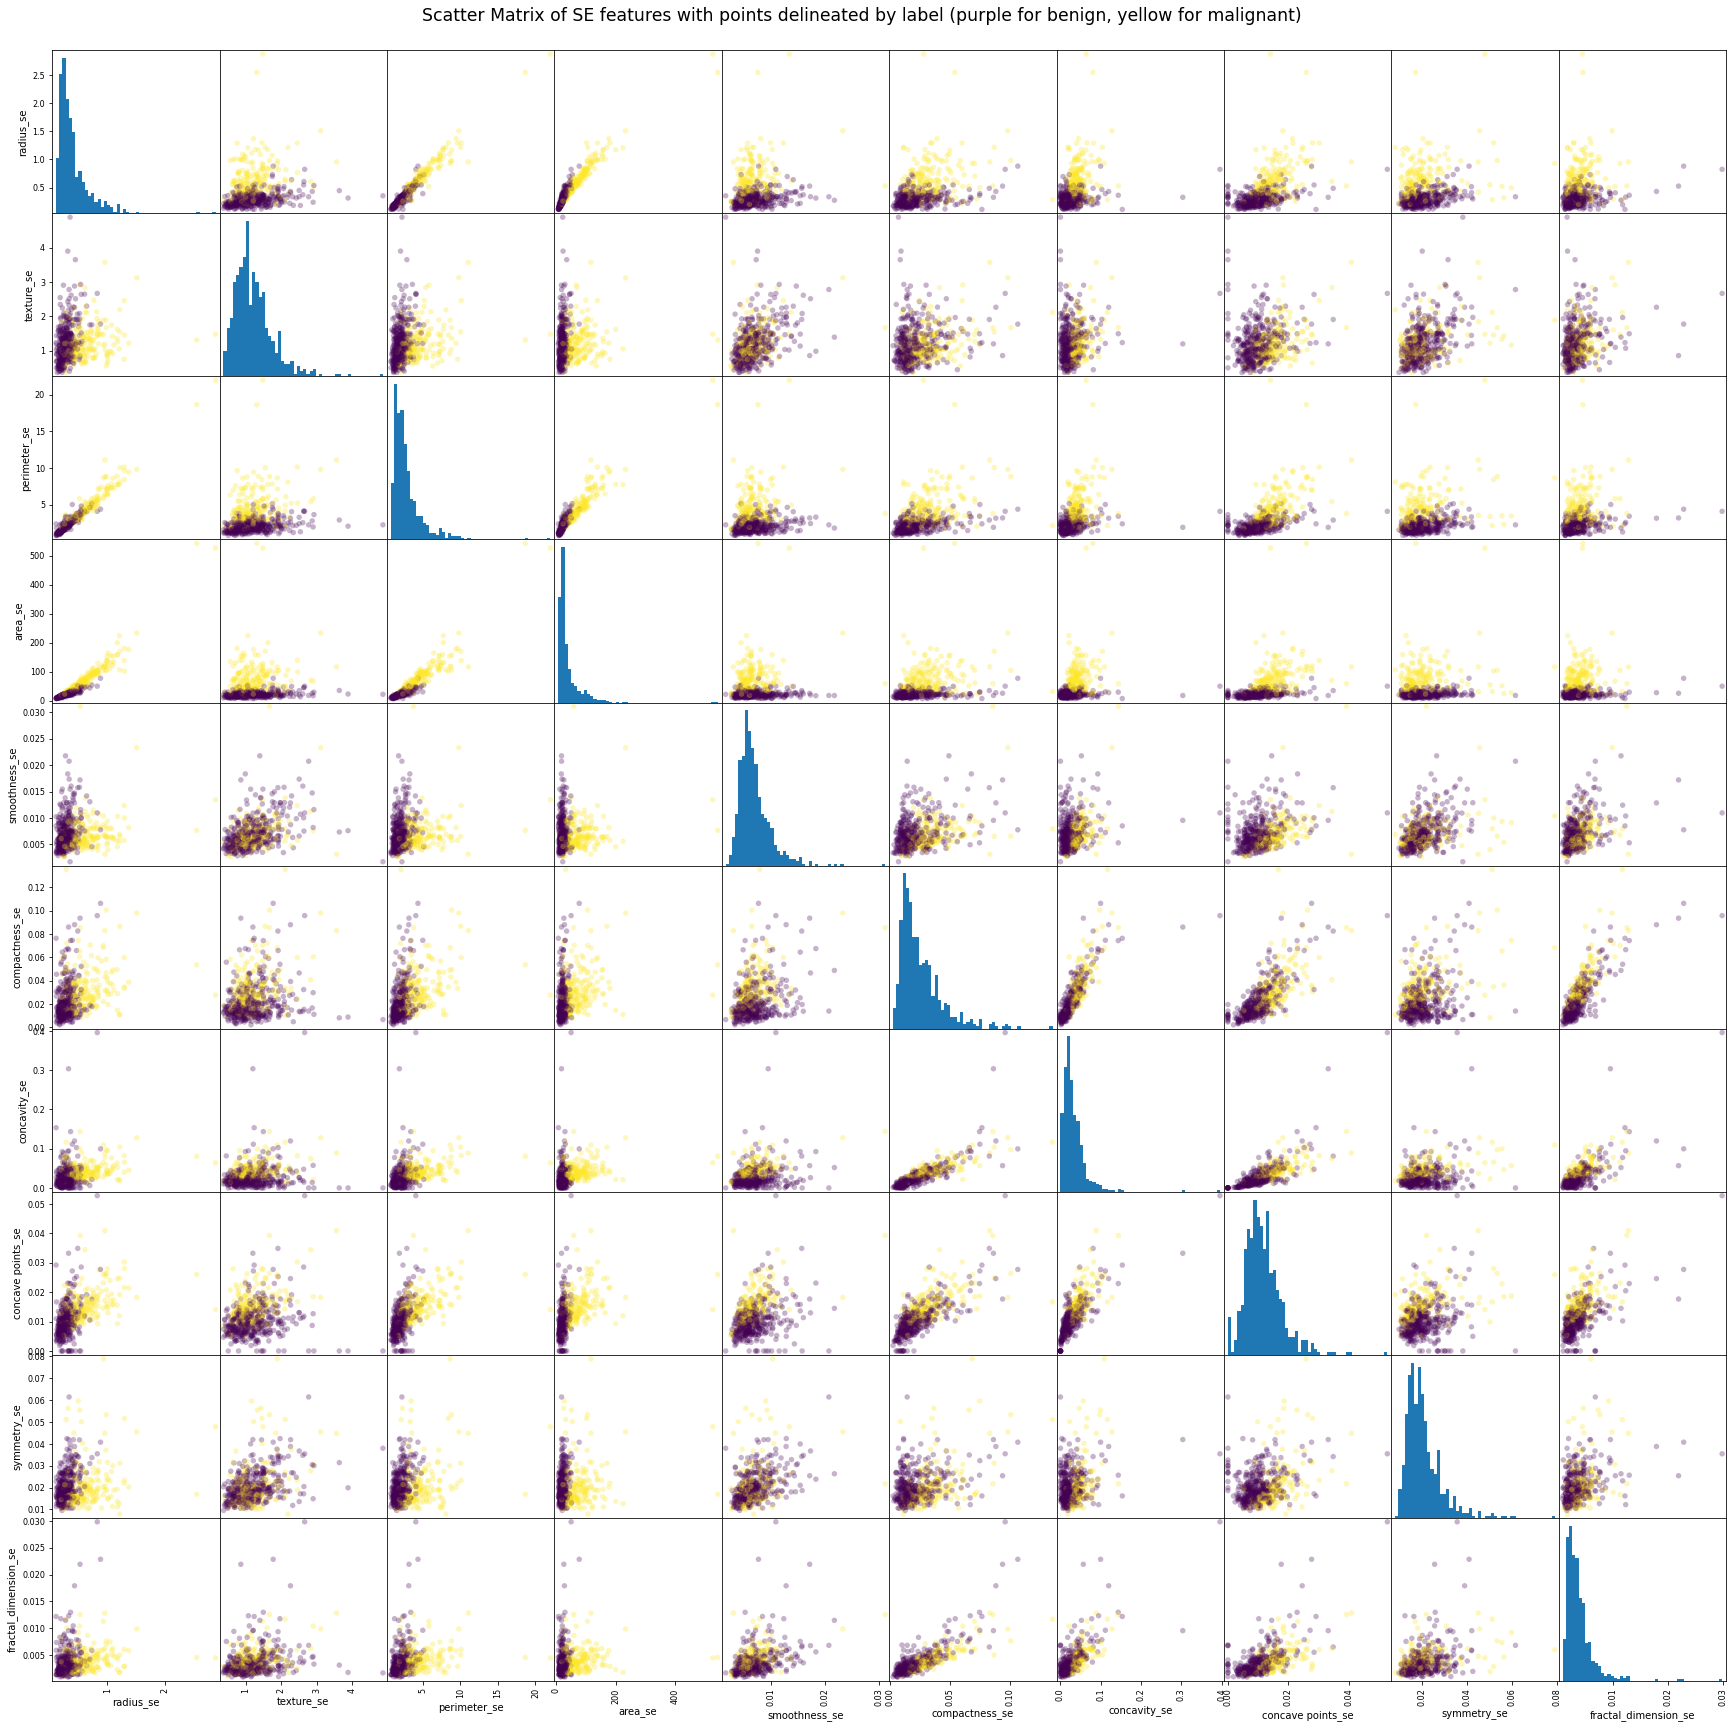

In [21]:
pd.plotting.scatter_matrix(df.iloc[:,11:21], figsize=(30, 30),c = pd.get_dummies(df['diagnosis']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.3)
plt.suptitle('Scatter Matrix of SE features with points delineated by label (purple for benign, yellow for malignant)', 
            y = 0.90, fontsize='xx-large')
figtitle = f'../figures/scattermatrix_se.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

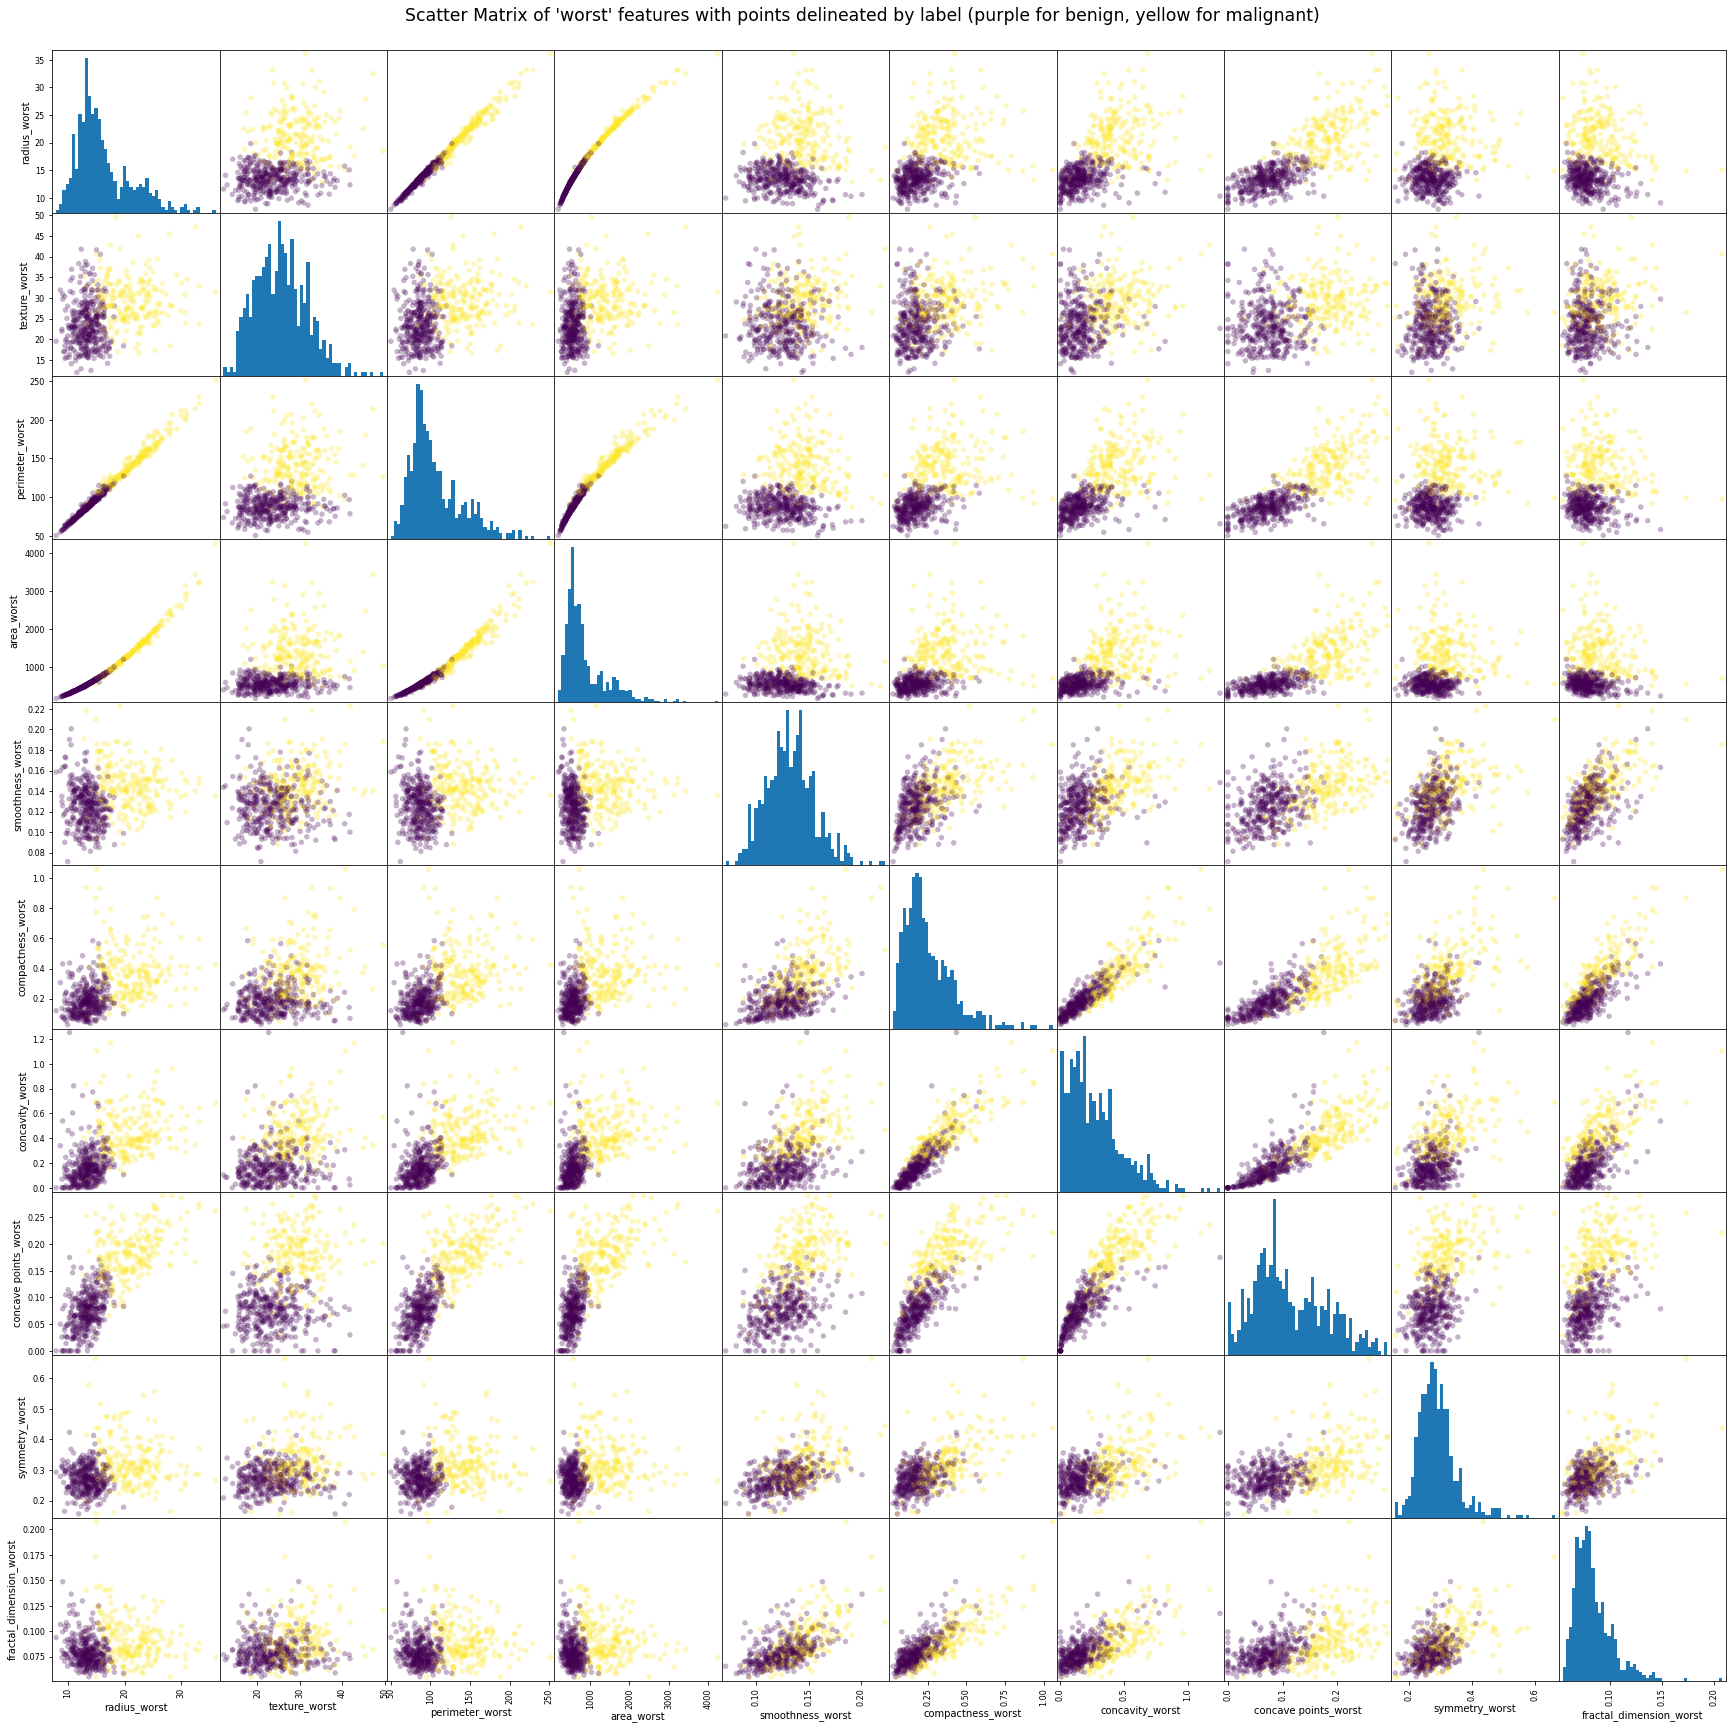

In [22]:
pd.plotting.scatter_matrix(df.iloc[:,21:], figsize=(30, 30),c = pd.get_dummies(df['diagnosis']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.3)
plt.suptitle('Scatter Matrix of \'worst\' features with points delineated by label (purple for benign, yellow for malignant)', 
            y = 0.90, fontsize='xx-large')
figtitle = f'../figures/scattermatrix_worst.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

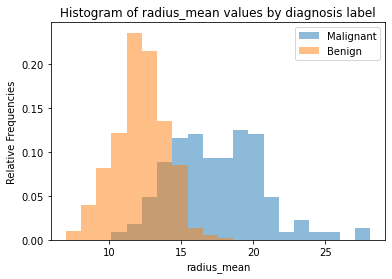

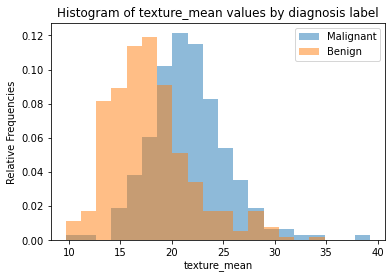

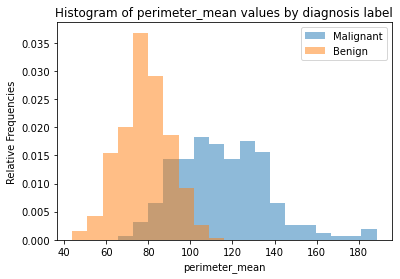

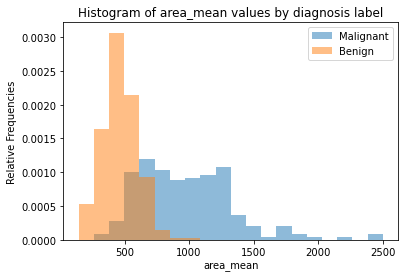

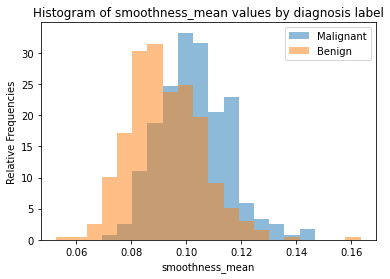

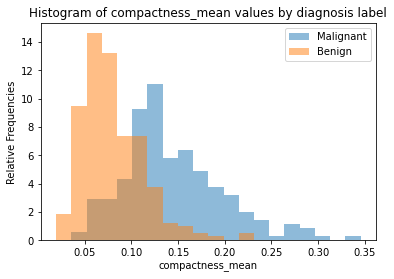

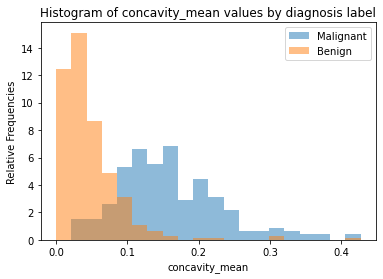

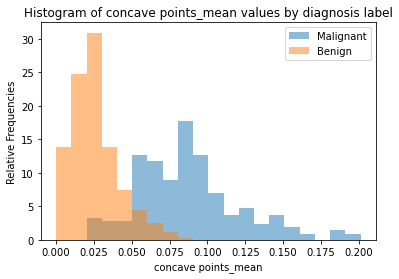

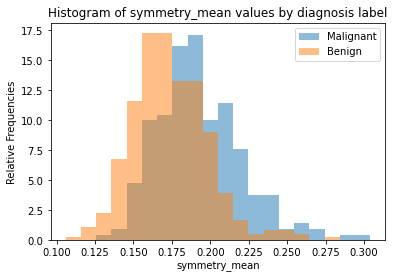

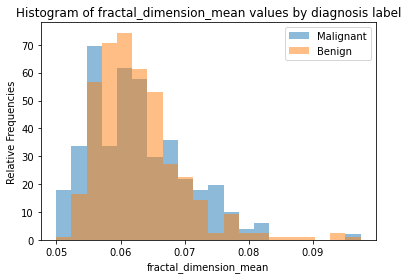

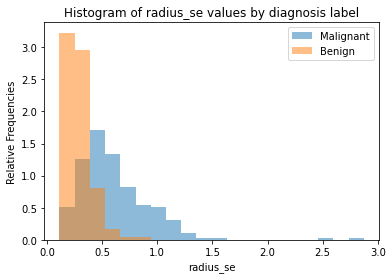

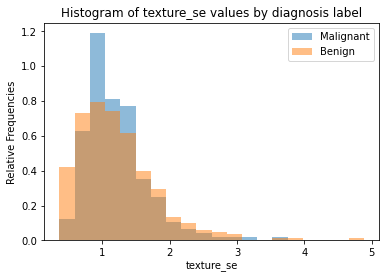

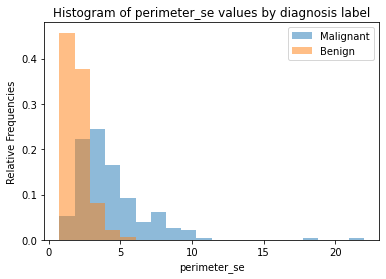

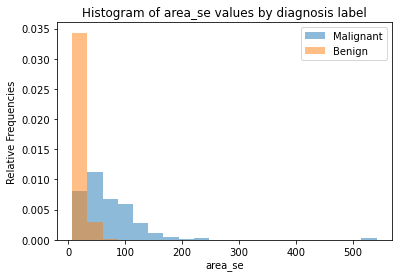

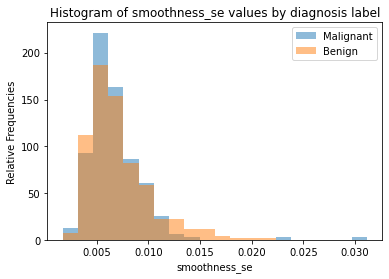

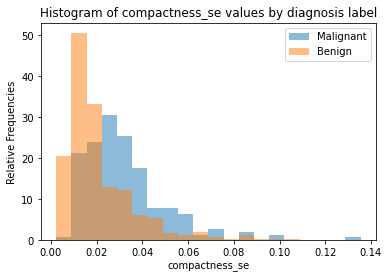

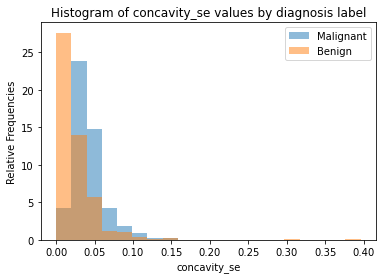

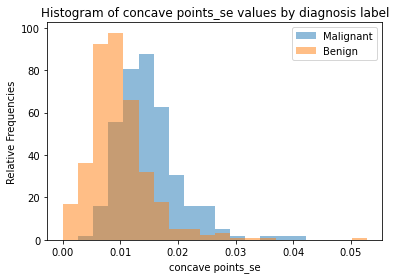

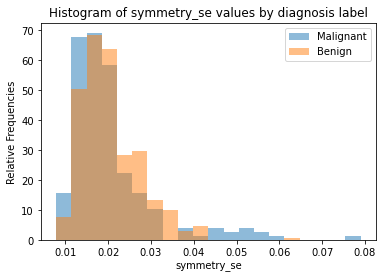

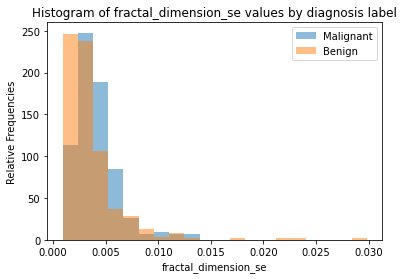

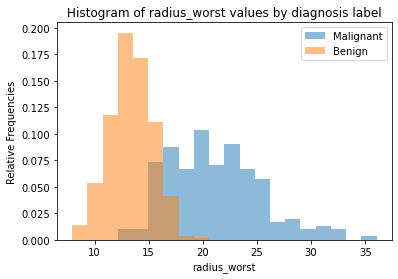

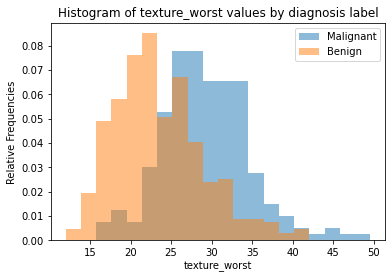

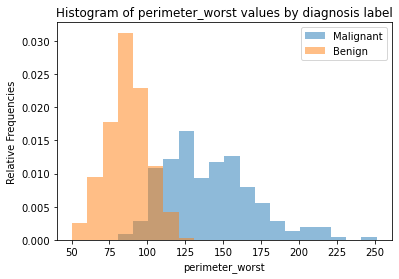

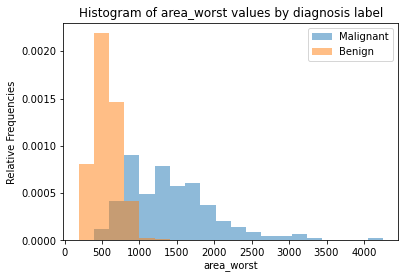

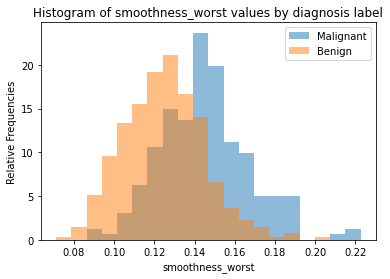

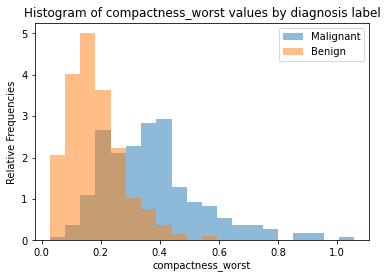

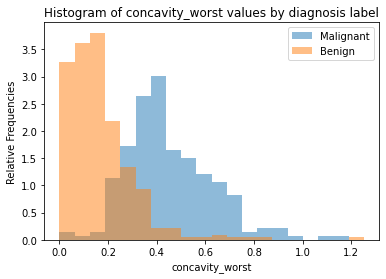

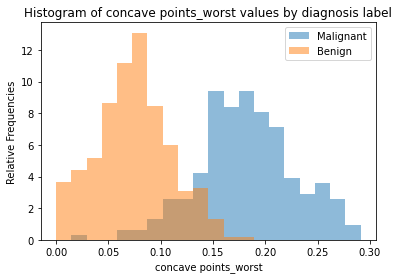

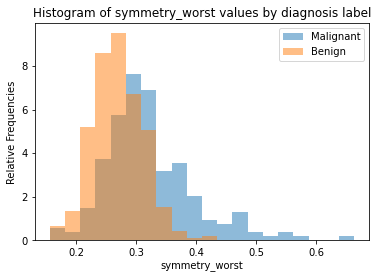

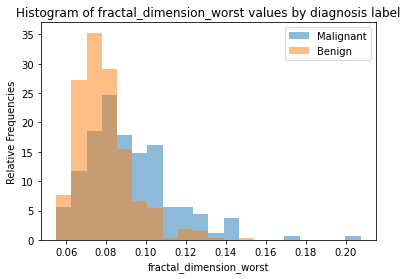

In [2]:
df.columns[1:]

categories = df['diagnosis'].unique()

for column in df.columns[1:]:
    
    bin_range = (df[column].min(),df[column].max())

    for c in categories:
        plt.hist(df[df['diagnosis']==c][column],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('Relative Frequencies')
    plt.xlabel(column)
    plt.title(f'Histogram of {column} values by diagnosis label')
    if column == "concave points_worst":
        figtitle = '../figures/histogram_categories_concave_points_worst.png'
    else:
        figtitle = f'../figures/histogram_categories_{column}.png'
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()

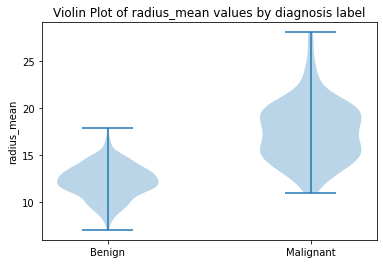

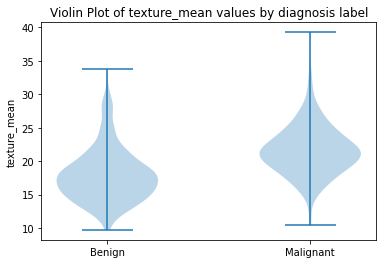

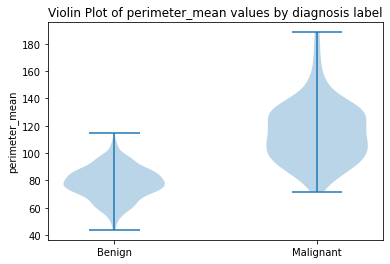

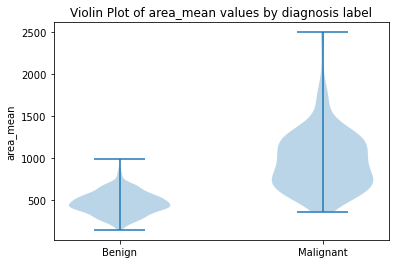

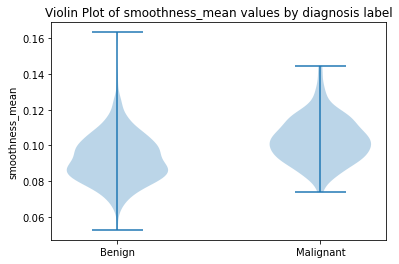

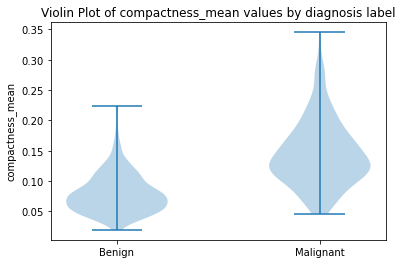

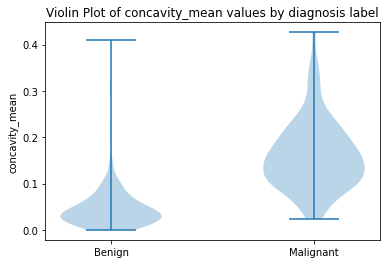

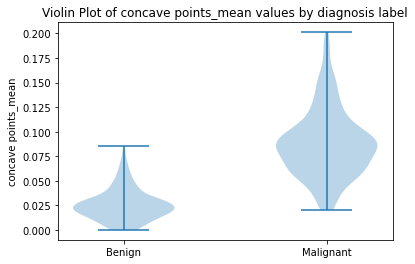

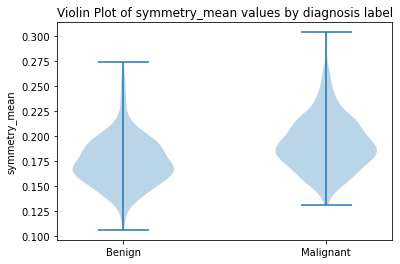

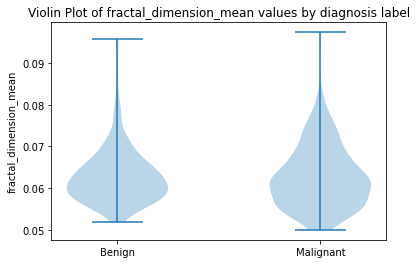

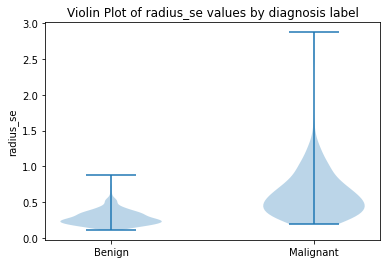

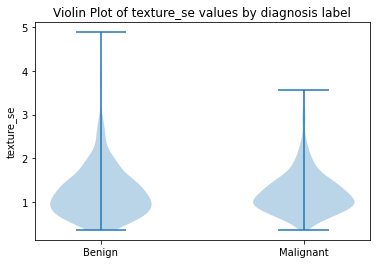

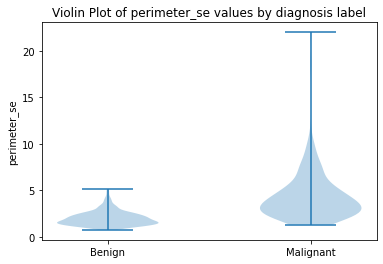

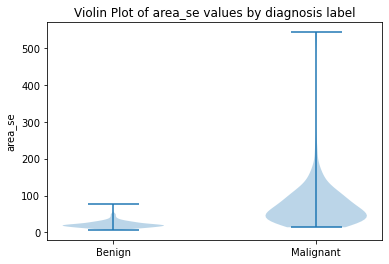

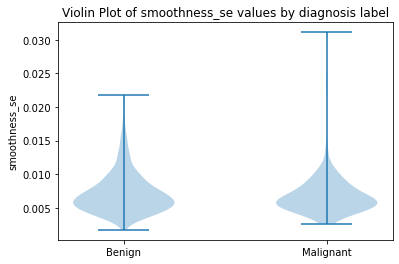

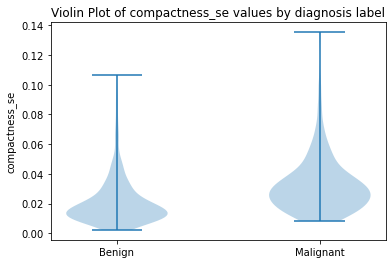

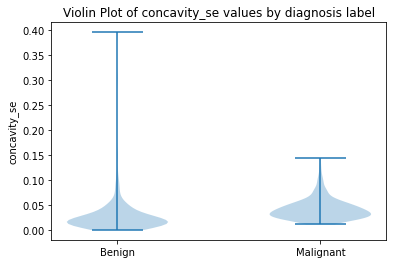

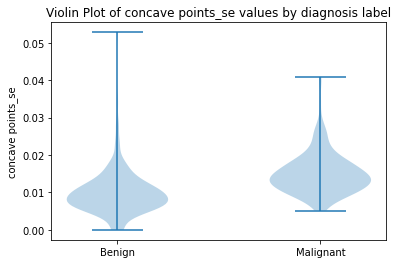

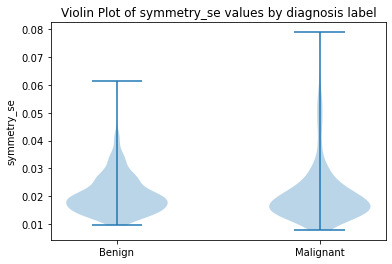

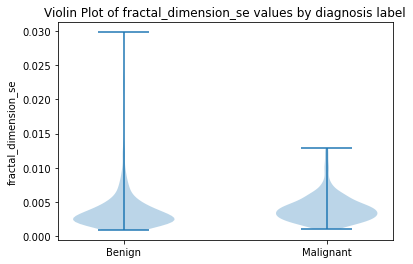

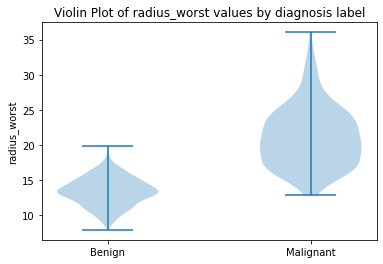

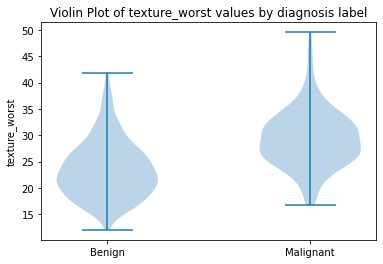

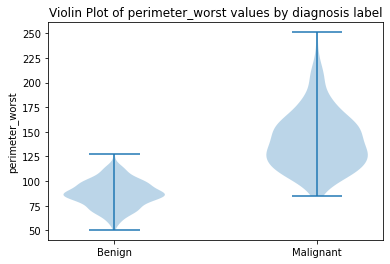

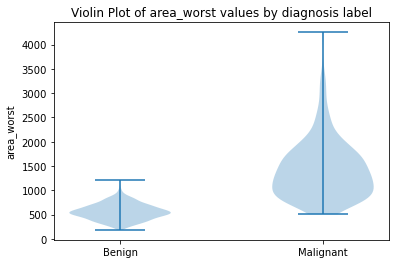

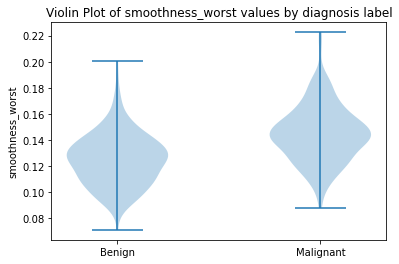

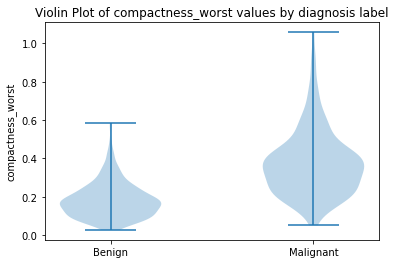

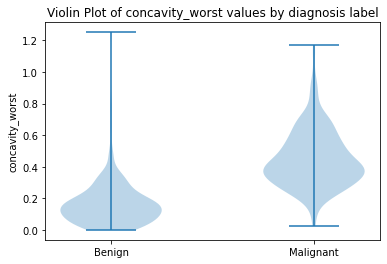

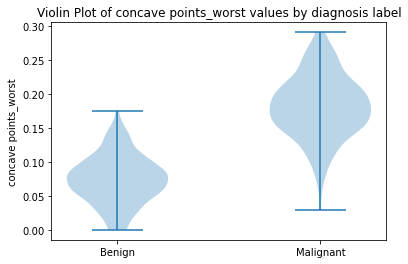

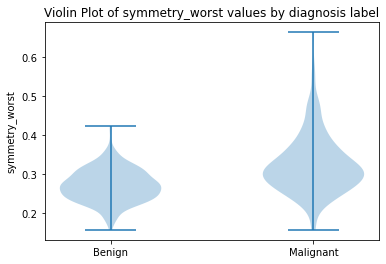

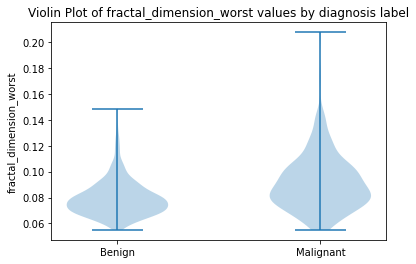

In [8]:
for column in df.columns[1:]:

    dataset = [df[df['diagnosis']=='Benign'][column].values,
               df[df['diagnosis']=='Malignant'][column].values]

    plt.violinplot(dataset = dataset)
    plt.xticks([1,2],['Benign','Malignant'])
    plt.ylabel(column)
    plt.title(f'Violin Plot of {column} values by diagnosis label')
    figtitle = f'../figures/violin_categories_{column}.png'
    plt.savefig(figtitle, dpi=300, format='png')
    plt.show()

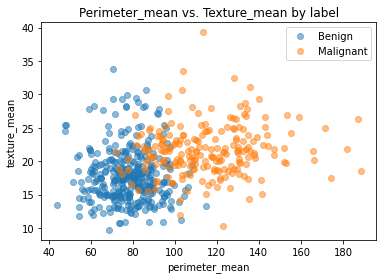

In [9]:
groups = df.groupby("diagnosis")
for name, group in groups:
    plt.plot(group['perimeter_mean'], group['texture_mean'], marker="o", linestyle="", label=name,alpha=0.5)
plt.title("Perimeter_mean vs. Texture_mean by label")
plt.xlabel('perimeter_mean')
plt.ylabel('texture_mean')
plt.legend()
figtitle = '../figures/scatter_permean_textmean.png'
plt.savefig(figtitle, dpi=300, format='png')
plt.show()

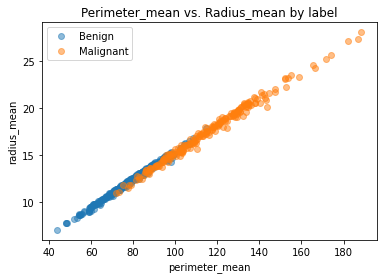

In [3]:
groups = df.groupby("diagnosis")
for name, group in groups:
    plt.plot(group['perimeter_mean'], group['radius_mean'], marker="o", linestyle="", label=name,alpha=0.5)
plt.title("Perimeter_mean vs. Radius_mean by label")
plt.xlabel('perimeter_mean')
plt.ylabel('radius_mean')
plt.legend()
# figtitle = '../figures/scatter_permean_textmean.png'
# plt.savefig(figtitle, dpi=300, format='png')
plt.show()